In [47]:
# Libraries Data Description / Preparation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import warnings
import json
warnings.filterwarnings('ignore')

In [48]:
# Loading necessary Files <- your file path here
wine_quality = pd.read_csv("C:/Users/Nishant Moona/Downloads/Wine_Quality/winequality-red.csv")

In [49]:
#Displaying top 5 rows
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
#Checking Duplicate Entries
wine_quality.duplicated().any()

True

In [51]:
duplicates = wine_quality.duplicated()
print ("Duplicates:\n", duplicates)

Duplicates:
 0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool


In [52]:
duplicate_rows = wine_quality[wine_quality.duplicated()]
print ("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free

In [53]:
wine_quality_cleaned = wine_quality.drop_duplicates (keep='first')
print ("DataFrame after removing duplicates:\n", wine_quality_cleaned)

DataFrame after removing duplicates:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6     

In [54]:
wine_quality_cleaned.shape

(1359, 12)

In [55]:
wine_quality_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [56]:
#Checking the missing values
wine_quality_cleaned.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [57]:
wine_quality_cleaned['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [58]:
#descriptive statistics summarize the central tendency, dispersion, and shape of a dataset distribution
wine_quality_cleaned.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

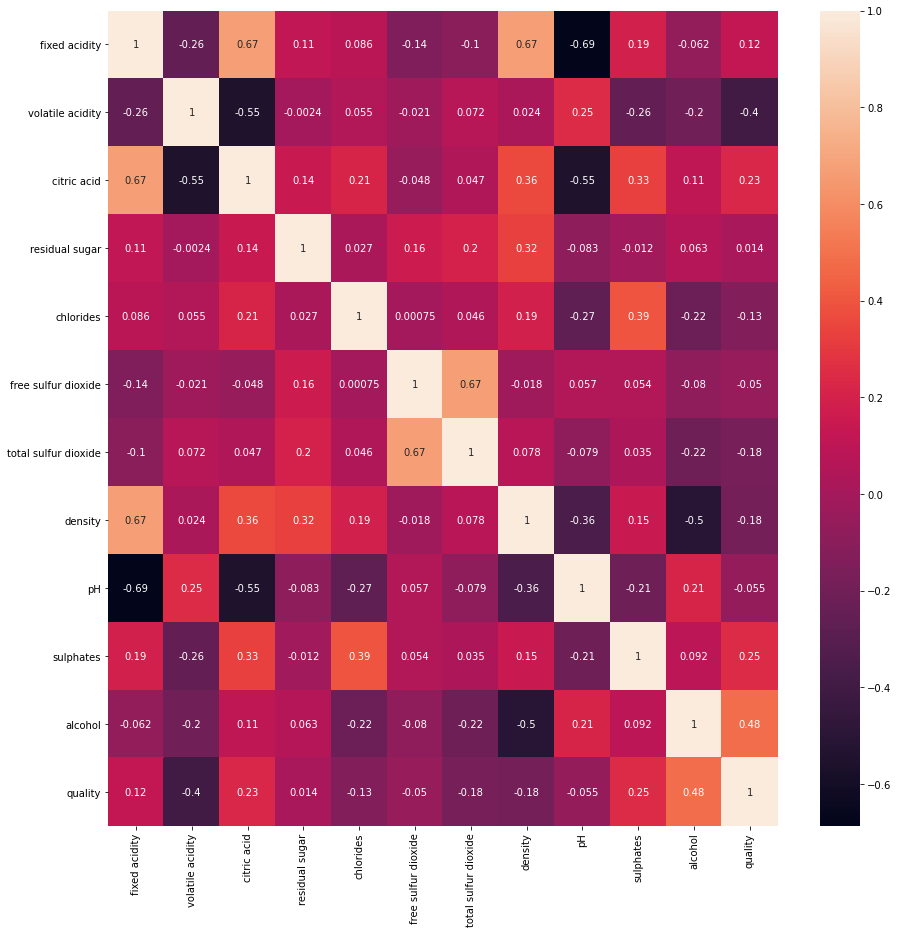

In [59]:
#Creating the Correlation Matrix
plt.figure (figsize = (15, 15))
sns.heatmap (data = wine_quality_cleaned.corr(), annot = True)

In [60]:
#Much better view of Correlation Matrix to understand, it is basically for colour blind
wine_quality_cleaned.corr().style.background_gradient(cmap = 'YlOrRd')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [61]:
# Create a variable to define the Target Variable
correlation_with_target = wine_quality_cleaned.corrwith(wine_quality_cleaned['quality'])

# Create a DataFrame with correlation values
correlation_matrix = pd.DataFrame(correlation_with_target, columns=['correlation_with_target'])

# Sort the correlations
correlation_matrix_sorted = correlation_matrix.sort_values(by = 'correlation_with_target', ascending = False)

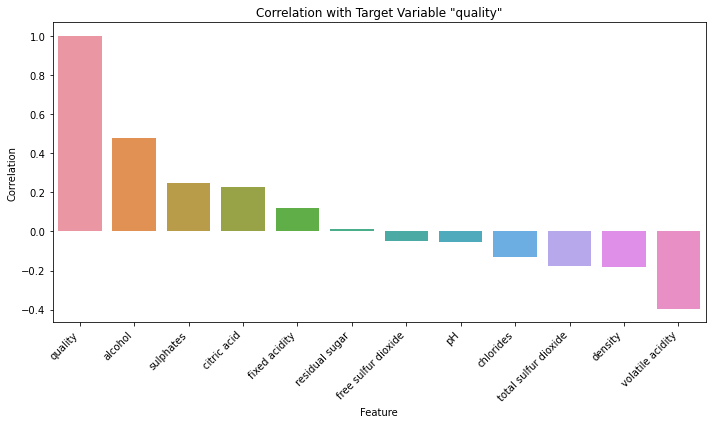

In [62]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix_sorted.index, y='correlation_with_target', data=correlation_matrix_sorted)
plt.title('Correlation with Target Variable "quality"')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

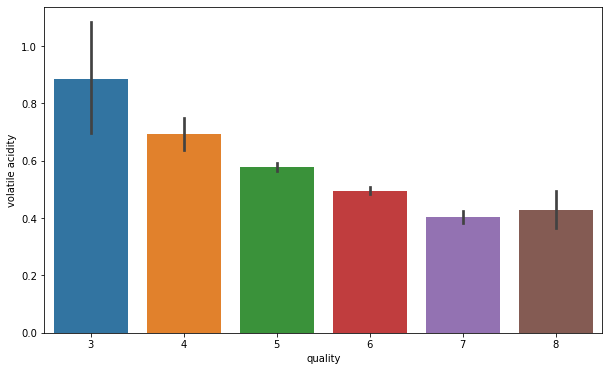

In [63]:
#This is continuously decreasing i.e. Volatile Acidity is decreasing with improved quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='volatile acidity', data=wine_quality_cleaned)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

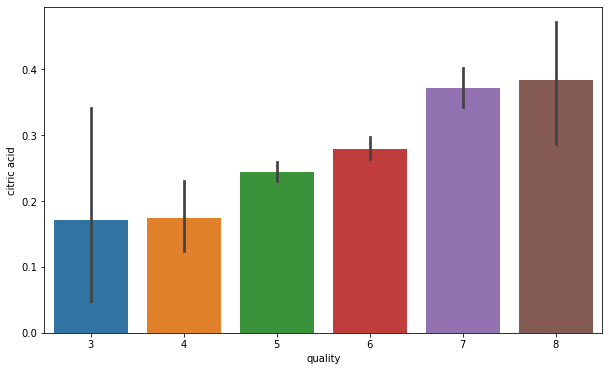

In [64]:
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='citric acid', data=wine_quality_cleaned)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

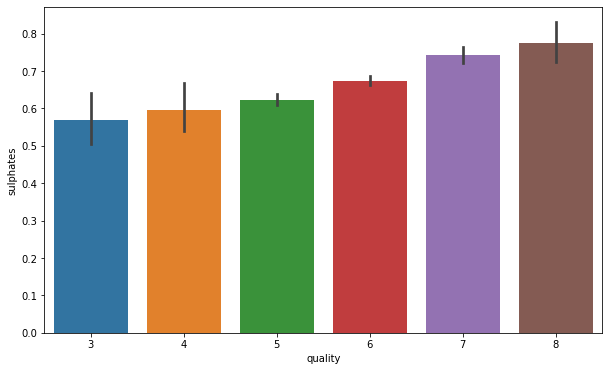

In [65]:
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='sulphates', data=wine_quality_cleaned)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

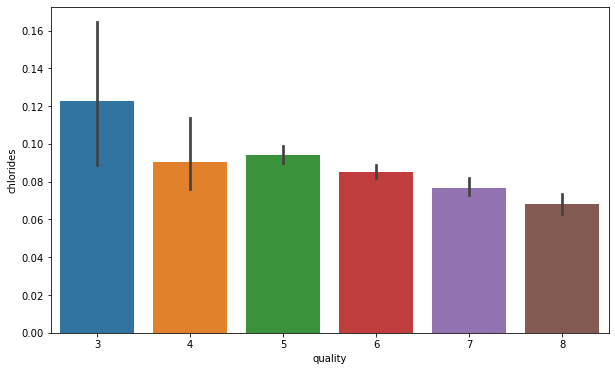

In [66]:
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='chlorides', data=wine_quality_cleaned)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

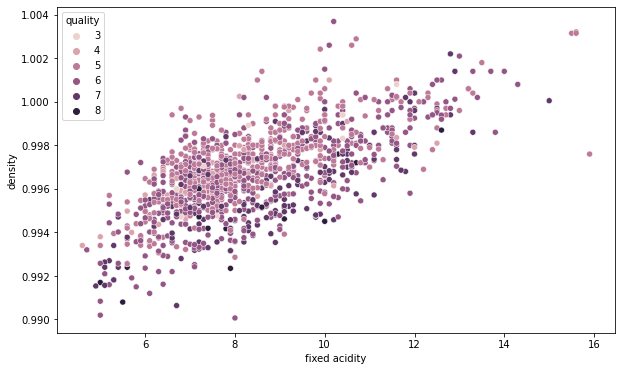

In [67]:
#From correlation matrix as they have strongest correlation
plt.figure(figsize = (10,6))
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=wine_quality_cleaned)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

<Figure size 1440x864 with 0 Axes>

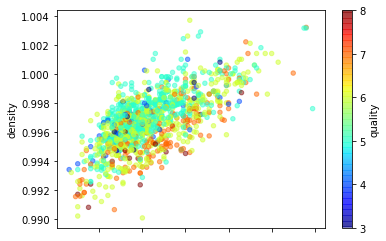

In [68]:
plt.figure(figsize = (20,12))
wine_quality_cleaned.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

# Linear Regression Model

Mean Cross-Validation MSE: 0.45289729283317526
Testing Mean Squared Error: 0.4254994652752946
Testing R^2 Score: 0.36571593482042686
Training Mean Squared Error: 0.43494924592368006
Training R^2 Score: 0.35989160664418474


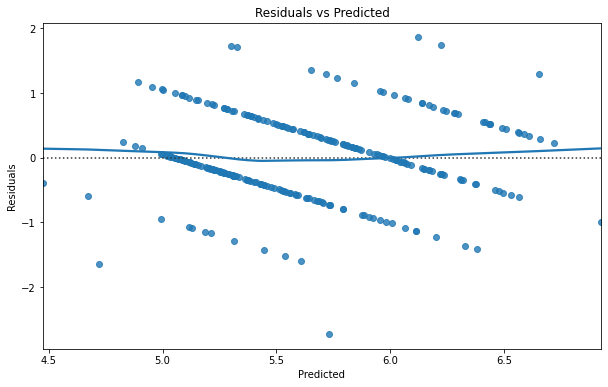

                      Coefficient
fixed acidity            0.021769
volatile acidity        -0.187450
citric acid              0.014373
residual sugar          -0.020710
chlorides               -0.092894
free sulfur dioxide      0.053464
total sulfur dioxide    -0.090362
density                 -0.015206
pH                      -0.056484
sulphates                0.147815
alcohol                  0.310124


In [69]:
# Performing Linear Regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = wine_quality_cleaned.drop('quality', axis=1)  # Features
y = wine_quality_cleaned['quality']  # Target

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#quality is a categorical variable, stratified sampling on training and testing datasets 
#maintain same distribution of quality ratings as the original dataset.

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Linear regression assumes that the features are on a comparable scale. 
#Standardizing the features can improve the performance and convergence of the model.

# Linear Regression
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error') #5 fold cross-validation
mean_cv_mse = -cv_scores.mean()
print("Mean Cross-Validation MSE:", mean_cv_mse)

# Predict on the test and training data
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Testing Mean Squared Error:", mse_test)
print("Testing R^2 Score:", r2_test)
print("Training Mean Squared Error:", mse_train)
print("Training R^2 Score:", r2_train)

# Residual analysis
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()
#Analyze the residuals for patterns that indicate issues with the model (non-linearity, heteroscedasticity).

# Feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
#interpret the importance of features

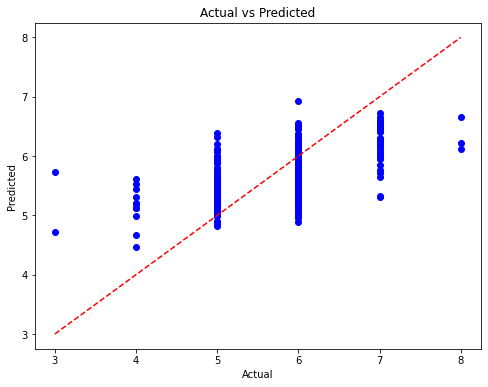

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.ylabel('Predicted')
plt.xlabel("Actual")
plt.title('Actual vs Predicted')
plt.show()

# Lasso 

Test Mean Squared Error (Lasso Regression): 0.42387634681245195
Training Mean Squared Error (Lasso Regression): 0.4352843971922392
Testing R^2 Score: 0.368135487042928
Training R^2 Score: 0.35939836946292925


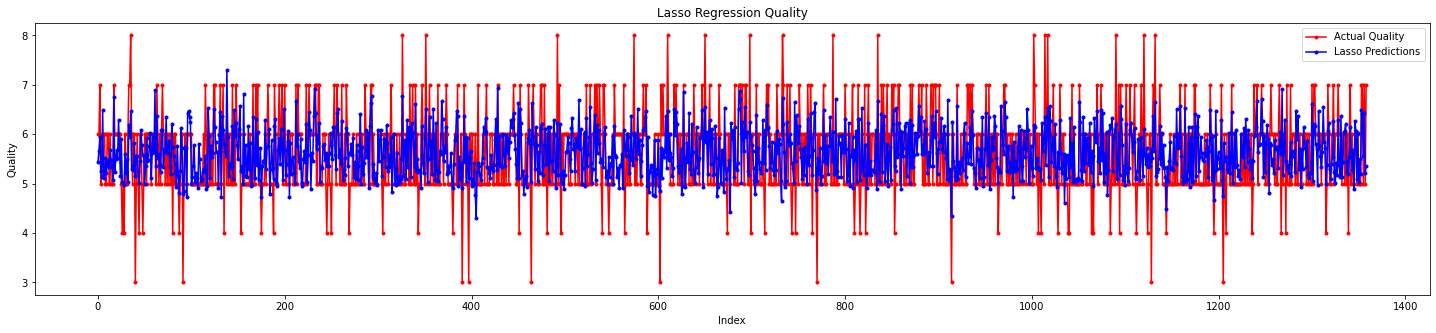

In [71]:
from sklearn.linear_model import LassoCV

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression with Cross-Validation
lasso_model = LassoCV(cv=5)  # 5-fold cross-validation
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test and training data
y_test_pred_lasso = lasso_model.predict(X_test_scaled)
y_train_pred_lasso = lasso_model.predict(X_train_scaled)

# Evaluate the Mean Squared Error
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

print("Test Mean Squared Error (Lasso Regression):", mse_test_lasso)
print("Training Mean Squared Error (Lasso Regression):", mse_train_lasso)
print("Testing R^2 Score:", r2_test_lasso)
print("Training R^2 Score:", r2_train_lasso)

# Concatenate predictions for train and test sets
lasso_pred = np.concatenate([y_train_pred_lasso, y_test_pred_lasso])
#lasso_pred = lasso_pred.astype(float)
# Assign predictions to a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual Quality': np.concatenate([y_train, y_test]),
    'Predicted Quality (Lasso)': lasso_pred
})

# Reset index to align with the concatenated data
plot_df.reset_index(drop=True, inplace=True)

# Plotting the results
plt.figure(figsize=(25, 5))
plt.title("Lasso Regression Quality")
plt.xlabel("Index")
plt.ylabel("Quality")
plt.plot(plot_df.index, plot_df["Actual Quality"], color="red", marker=".", label="Actual Quality")
plt.plot(plot_df.index, plot_df["Predicted Quality (Lasso)"], color="blue", marker=".", label="Lasso Predictions")
plt.legend()
plt.show()

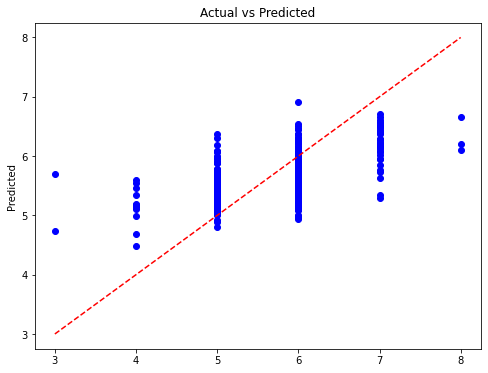

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lasso, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Random Forest Classifier Model

Test Accuracy (Random Forest): 0.5882352941176471
Training Accuracy (Random Forest): 1.0
Classification Report (Test Data):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.74      0.70       116
           6       0.58      0.61      0.59       107
           7       0.36      0.27      0.31        33
           8       0.00      0.00      0.00         3

    accuracy                           0.59       272
   macro avg       0.27      0.27      0.27       272
weighted avg       0.55      0.59      0.57       272



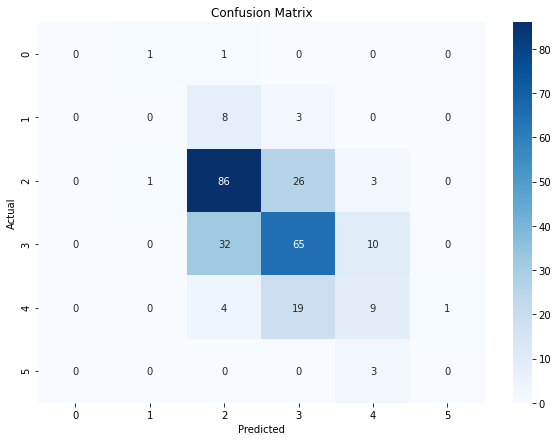

                      Importance
alcohol                 0.152227
sulphates               0.110649
volatile acidity        0.106672
total sulfur dioxide    0.099464
density                 0.085937
chlorides               0.081418
pH                      0.078515
fixed acidity           0.076206
citric acid             0.072079
residual sugar          0.069373
free sulfur dioxide     0.067461


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# wine_quality_cleaned is our cleaned DataFrame
X = wine_quality_cleaned.drop('quality', axis=1)  # Features
y = wine_quality_cleaned['quality']  # Target

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForest Classifier
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = RandomForestClassifier()
#rf_morf_model = RandomForestClassifier(n_estimators=100, random_state=42)del.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
# Predict on the test and training data
y_test_pred_rf = rf_model.predict(X_test_scaled)
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Evaluate the model
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Test Accuracy (Random Forest):", accuracy_test_rf)
print("Training Accuracy (Random Forest):", accuracy_train_rf)

# Classification Report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

In [74]:
#Hyperparameters tuning
#param_dist = {'n_estimators': randint(50,500),
#              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(max_depth = 15, n_estimators = 428)
rf.fit(X_train, y_train)
# Use random search to find the best hyperparameters
#rand_search = RandomizedSearchCV(rf, 
#                                 param_distributions = param_dist, 
#                                 n_iter=5, 
#                                 cv=5)

# Fit the random search object to the data
#rand_search.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=428)

In [75]:
# Create a variable for the best model
#best_rf = rand_search.best_estimator_

# Print the best hyperparameters
#print('Best hyperparameters:',  rand_search.best_params_)

Classification Report (Test Data):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.68      0.72      0.70       116
           6       0.56      0.65      0.60       107
           7       0.50      0.30      0.38        33
           8       0.00      0.00      0.00         3

    accuracy                           0.60       272
   macro avg       0.29      0.28      0.28       272
weighted avg       0.57      0.60      0.58       272



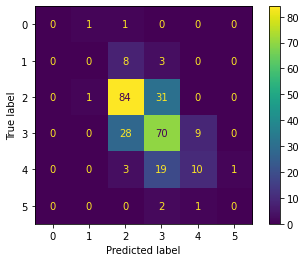

In [76]:
#More evaluation
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Classification Report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred))

In [77]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality

# Making binary classification for the response variable

# Defining bins and labels for classification
bins = [2, 6.5, 8]  # Adjusted to use list for better readability
group_names = ['bad', 'good']

# Applying cut function to create binary classification
wine_quality_cleaned['quality'] = pd.cut(wine_quality_cleaned['quality'], bins=bins, labels=group_names, right=False)

# Optional: If you need to convert the labels to binary numeric values (0 and 1)
wine_quality_cleaned['quality'] = wine_quality_cleaned['quality'].map({'bad': 0, 'good': 1})

In [78]:
wine_quality_cleaned['quality'].value_counts()

0    1175
1     167
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

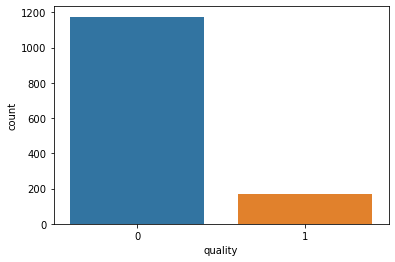

In [79]:
sns.countplot(wine_quality_cleaned['quality'])

Test Accuracy (Random Forest): 0.9070631970260223
Training Accuracy (Random Forest): 1.0
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       236
           1       0.75      0.36      0.49        33

    accuracy                           0.91       269
   macro avg       0.83      0.67      0.72       269
weighted avg       0.90      0.91      0.89       269



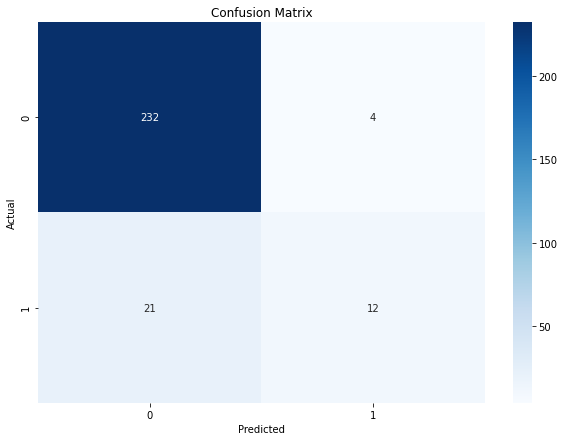

                      Importance
alcohol                 0.153601
sulphates               0.141790
volatile acidity        0.107829
density                 0.093201
total sulfur dioxide    0.086720
citric acid             0.082373
fixed acidity           0.079979
chlorides               0.070263
free sulfur dioxide     0.064499
pH                      0.060734
residual sugar          0.059012


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Now seperate the dataset as response variable and feature variabes
X = wine_quality_cleaned.drop('quality', axis=1)  # Features
y = wine_quality_cleaned['quality']  # Target

# Handle missing values
wine_quality_cleaned = wine_quality_cleaned.dropna()

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test and training data
y_test_pred_rf = rf_model.predict(X_test_scaled)
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Evaluate the model
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Test Accuracy (Random Forest):", accuracy_test_rf)
print("Training Accuracy (Random Forest):", accuracy_train_rf)

# Classification Report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

In [97]:
# Stochastic Gradient Decent Classifier
from sklearn.linear_model import SGDClassifier

#sgd_model = SGDClassifier(loss='log', max_iter=2000, tol=1e-3, random_state=42)
sgd_model = SGDClassifier(penalty=None)
sgd_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

# Evaluate the model
accuracy_test_sgd = accuracy_score(y_test, y_test_pred_sgd)
print("Test Accuracy (SGD Classifier):", accuracy_test_sgd)

# Classification Report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred_sgd))


Test Accuracy (SGD Classifier): 0.895910780669145
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       236
           1       0.65      0.33      0.44        33

    accuracy                           0.90       269
   macro avg       0.78      0.65      0.69       269
weighted avg       0.88      0.90      0.88       269



In [94]:

#Stochastic Gradient Decent Classifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)


print(classification_report(y_test, pred_sgd))

print(confusion_matrix(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       236
           1       0.54      0.61      0.57        33

    accuracy                           0.89       269
   macro avg       0.74      0.77      0.75       269
weighted avg       0.89      0.89      0.89       269

[[219  17]
 [ 13  20]]


In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming wine_quality_cleaned is already imported and binary classification is performed as shown before

# Check if the quality column is properly binned and converted to binary
print(wine_quality_cleaned['quality'].value_counts())  # Debugging step to ensure the binary classification

# Handle missing values
wine_quality_cleaned = wine_quality_cleaned.dropna()

# Ensure all feature columns are numeric
X = wine_quality_cleaned.drop('quality', axis=1)
y = wine_quality_cleaned['quality']

# Convert categorical features to numeric if necessary (example with one-hot encoding)
# X = pd.get_dummies(X, drop_first=True)  # Uncomment if you have categorical features

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Initialize the SGD Classifier
sgd = SGDClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2) 
#use all available CPUs (n_jobs=-1), and verbose=2 for detailed output.

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_sgd = grid_search.best_estimator_
y_test_pred_sgd = best_sgd.predict(X_test_scaled)

# Evaluate the model
accuracy_test_sgd = accuracy_score(y_test, y_test_pred_sgd)
print("Test Accuracy (SGD Classifier with GridSearchCV):", accuracy_test_sgd)

# Classification Report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred_sgd))

0    1175
1     167
Name: quality, dtype: int64
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}
Best Cross-Validation Score: 0.8835122799391437
Test Accuracy (SGD Classifier with GridSearchCV): 0.9070631970260223
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       236
           1       0.83      0.30      0.44        33

    accuracy                           0.91       269
   macro avg       0.87      0.65      0.70       269
weighted avg       0.90      0.91      0.89       269



In [120]:
#Another method to apply Grid search CV
#Increasing the accuracy of the models
#Grid Search CV
#Finding best parameters for our SVC model
from sklearn.svm import SVC
    
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

# Initialize the SVC model
model_SVC = SVC()

# Initialize GridSearchCV
grid_svc = GridSearchCV(estimator=model_SVC, param_grid=param, scoring='accuracy', cv=10)#,# n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_svc.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_svc.best_params_)
print("Best Cross-Validation Score:", grid_svc.best_score_)

# Use the best estimator to make predictions
best_svc = grid_svc.best_estimator_
y_test_pred_svc = best_svc.predict(X_test_scaled)

# Evaluate the model
accuracy_test_svc = accuracy_score(y_test, y_test_pred_svc)
print("Test Accuracy (SVC with GridSearchCV):", accuracy_test_svc)

Best Parameters: {'C': 0.8, 'gamma': 0.8, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8863014884042922
Test Accuracy (SVC with GridSearchCV): 0.895910780669145


In [122]:
#Let's run our SVC again with the best parameters.

svc2 = SVC(C = 0.8, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train_scaled, y_train)
y_test_pred_sgd2 = svc2.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred_sgd2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       236
           1       1.00      0.15      0.26        33

    accuracy                           0.90       269
   macro avg       0.95      0.58      0.60       269
weighted avg       0.91      0.90      0.86       269

